In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [45]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [5]:
import os 

In [16]:
import cv2
X_train=[]
Y_train=[]
image_size=150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:\Users\Hitesh\Desktop\5 TH SEMESTER\MACHINE LEARNING\archive (8)\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'C:\Users\Hitesh\Desktop\5 TH SEMESTER\MACHINE LEARNING\archive (8)\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [17]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(5740, 150, 150, 3)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [19]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
146/146 [==============================] - 243s 2s/step - loss: 1.5895 - accuracy: 0.3908 - val_loss: 1.0273 - val_accuracy: 0.5280
Epoch 2/20
146/146 [==============================] - 241s 2s/step - loss: 0.8814 - accuracy: 0.6253 - val_loss: 0.8540 - val_accuracy: 0.5977
Epoch 3/20
146/146 [==============================] - 236s 2s/step - loss: 0.7083 - accuracy: 0.6946 - val_loss: 1.0750 - val_accuracy: 0.5783
Epoch 4/20
146/146 [==============================] - 234s 2s/step - loss: 0.5906 - accuracy: 0.7481 - val_loss: 0.6258 - val_accuracy: 0.7157
Epoch 5/20
146/146 [==============================] - 1757s 12s/step - loss: 0.4900 - accuracy: 0.7911 - val_loss: 1.0311 - val_accuracy: 0.6093
Epoch 6/20
146/146 [==============================] - 239s 2s/step - loss: 0.4477 - accuracy: 0.8150 - val_loss: 0.4608 - val_accuracy: 0.7892
Epoch 7/20
146/146 [==============================] - 261s 2s/step - loss: 0.3523 - accuracy: 0.8522 - val_loss: 0.7207 - val_accuracy: 0.70

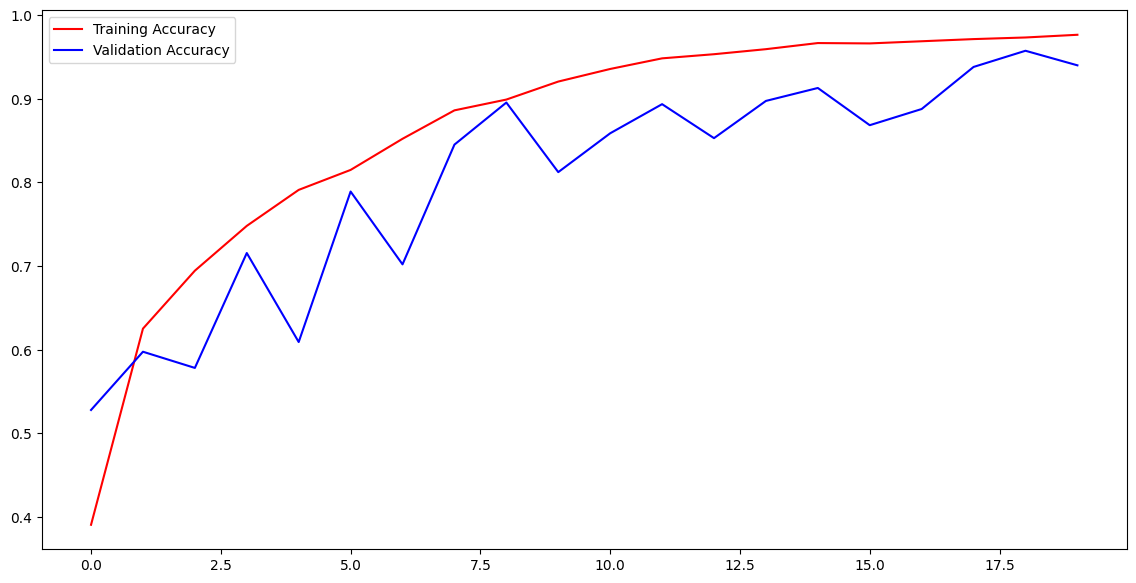

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

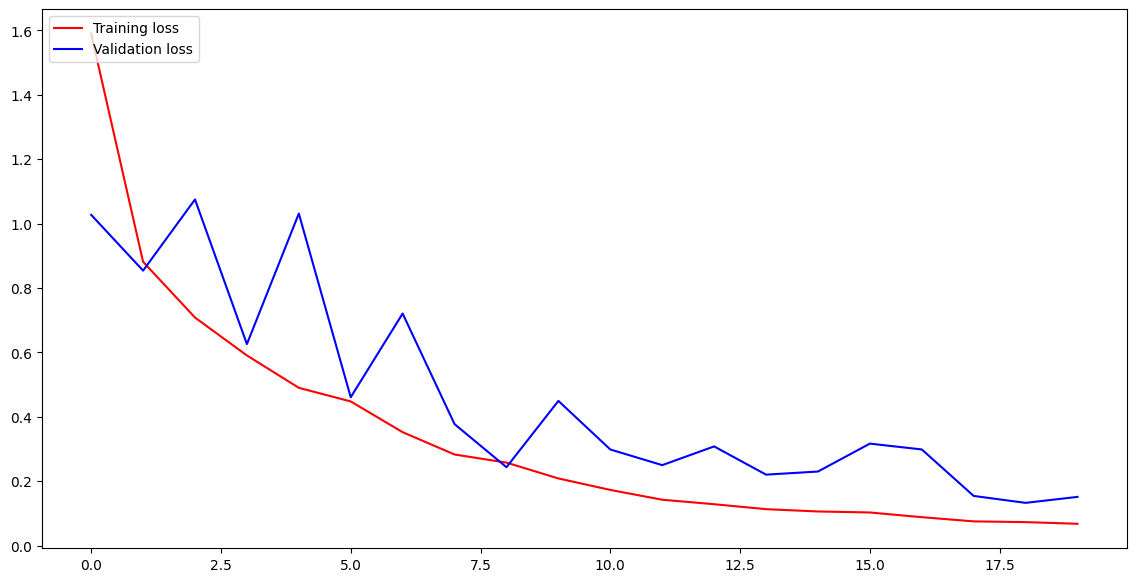

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [65]:
img = cv2.imread(r'C:\Users\Hitesh\Desktop\5 TH SEMESTER\MACHINE LEARNING\archive (8)\Testing\meningioma_tumor\image(36).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [66]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

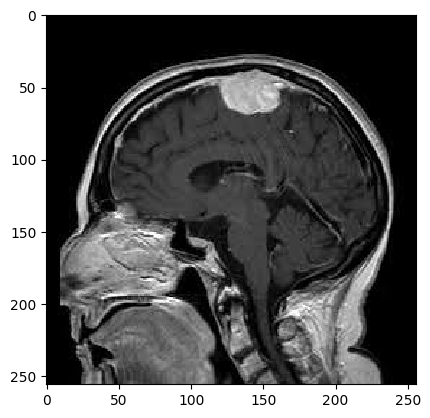

In [67]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\Hitesh\Desktop\5 TH SEMESTER\MACHINE LEARNING\archive (8)\Testing\meningioma_tumor\image(36).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [68]:
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 50ms/step
meningioma_tumor


In [57]:
Y_pred=model.predict(X_test)
Y_pred

18/18 [==============================] - 4s 217ms/step


array([[8.2231598e-04, 1.1114222e-02, 9.7939050e-01, 8.6730011e-03],
       [2.4813782e-02, 9.6720529e-01, 5.8024260e-03, 2.1784948e-03],
       [7.8564639e-09, 4.0913292e-05, 2.8557807e-07, 9.9995887e-01],
       ...,
       [1.0000000e+00, 1.1980293e-10, 3.1589582e-14, 1.1277898e-12],
       [1.7205584e-01, 8.2790774e-01, 1.9580320e-05, 1.6906872e-05],
       [1.2615653e-05, 1.3861175e-05, 6.4023590e-07, 9.9997294e-01]],
      dtype=float32)

In [58]:
loss, acc = model.evaluate(x=X_test, y=y_test)

18/18 [==============================] - 4s 211ms/step - loss: 0.2236 - accuracy: 0.9512


In [59]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.22357124090194702
Test Accuracy = 0.9512194991111755
